<a href="https://colab.research.google.com/github/shadowbd/Airline_delay_/blob/master/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving df_modeling_sample.csv to df_modeling_sample.csv


In [32]:
import pandas as pd
pd.set_option("display.max_columns", None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import os
from sqlalchemy import create_engine
import time
from datetime import datetime, date, time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import scipy.stats as st

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
df = pd.read_csv('df_modeling_sample.csv')

In [5]:
df.drop(axis = 1, labels = ['Unnamed: 0', 'arr_delay', 'weather_delay_mean.1'], inplace = True)

In [6]:
df.columns

Index(['distance', 'weather_delay_mean', 'nas_delay_mean',
       'security_delay_mean', 'late_aircraft_delay_mean', 'flight_delay',
       'flight_time_afternoon', 'flight_time_early-morning',
       'flight_time_evening', 'flight_time_mid-night', 'flight_time_morning',
       'flight_time_night', 'flight_season_spring', 'flight_season_summer',
       'flight_season_winter', 'flight_length_medium', 'flight_length_short'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distance                   7717 non-null   float64
 1   weather_delay_mean         7717 non-null   float64
 2   nas_delay_mean             7717 non-null   float64
 3   security_delay_mean        7717 non-null   float64
 4   late_aircraft_delay_mean   7717 non-null   float64
 5   flight_delay               7717 non-null   int64  
 6   flight_time_afternoon      7717 non-null   int64  
 7   flight_time_early-morning  7717 non-null   int64  
 8   flight_time_evening        7717 non-null   int64  
 9   flight_time_mid-night      7717 non-null   int64  
 10  flight_time_morning        7717 non-null   int64  
 11  flight_time_night          7717 non-null   int64  
 12  flight_season_spring       7717 non-null   int64  
 13  flight_season_summer       7717 non-null   int64

In [8]:
num_col = ['distance', 'weather_delay_mean', 'nas_delay_mean', 'security_delay_mean', 'late_aircraft_delay_mean']

In [9]:
cat_col = ['flight_time_afternoon', 'flight_time_early-morning', 'flight_time_evening', 'flight_time_mid-night', 'flight_time_morning', 'flight_time_night', 'flight_season_spring', 'flight_season_summer', 'flight_season_winter', 'flight_length_medium', 'flight_length_short']

In [10]:
y = df['flight_delay']

In [11]:
X = df.loc[:, df.columns != 'flight_delay']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

In [13]:
scaler = StandardScaler()

In [14]:
scaler_X_train = scaler.fit_transform(X_train)

In [15]:
scaler_X_test = scaler.fit_transform(X_test)

In [16]:
log_model = LogisticRegressionCV()

In [17]:
fit_data = log_model.fit(scaler_X_train, y_train)

In [18]:
y_pred = log_model.predict(scaler_X_test)
test_prob = log_model.predict_proba(scaler_X_test)[:, 1]

In [19]:
confusion_matrix(y_test, y_pred)

array([[1014,   14],
       [ 510,    6]])

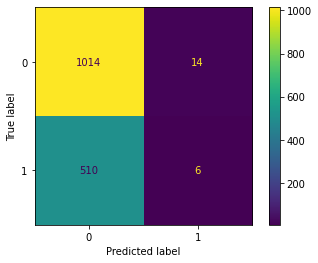

In [20]:
plot_confusion_matrix(log_model, scaler_X_test, y_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.99      0.79      1028
           1       0.30      0.01      0.02       516

    accuracy                           0.66      1544
   macro avg       0.48      0.50      0.41      1544
weighted avg       0.54      0.66      0.54      1544



In [22]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))

print('\nClassification Report')
print(classification_report(y_test, y_pred))

Log loss = 0.62163
AUC = 0.61003
Average Precision = 0.41451

Using 0.5 as threshold:
Accuracy = 0.66062
Precision = 0.30000
Recall = 0.01163
F1 score = 0.02239

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.99      0.79      1028
           1       0.30      0.01      0.02       516

    accuracy                           0.66      1544
   macro avg       0.48      0.50      0.41      1544
weighted avg       0.54      0.66      0.54      1544



In [23]:
logres = LogisticRegression(max_iter=1000)
k_folds = KFold(n_splits=5)
penalty = ['l1', 'l2']
C = np.logspace(0,4,10)
params_dict = {'penalty' : ['l1','l2'], 'C' : np.logspace(0,4,10)}
k_folds = KFold(n_splits=5)
grid = GridSearchCV(estimator=logres, param_grid=params_dict, cv=k_folds, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [24]:
#fit_data = log_model.fit(scaler_X_train, y_train)

In [25]:
fit_data_1 = grid.fit(scaler_X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [26]:
y_pred_1 = grid.predict(scaler_X_test)

In [27]:
test_prob_1 = grid.predict_proba(scaler_X_test)[:, 1]

In [28]:
confusion_matrix(y_test, y_pred_1)

array([[1005,   23],
       [ 490,   26]])

In [29]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80      1028
           1       0.53      0.05      0.09       516

    accuracy                           0.67      1544
   macro avg       0.60      0.51      0.44      1544
weighted avg       0.62      0.67      0.56      1544



In [39]:
# print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob_1)))
# print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob_1)))
# print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob_1)))
# print('\nUsing 0.5 as threshold:')
# print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred_1)))
# print('Precision = {:.5f}'.format(precision_score(y_test, y_pred_1)))
# print('Recall = {:.5f}'.format(recall_score(y_test, y_pred_1)))
# print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred_1)))

# print('\nClassification Report')
# print(classification_report(y_test, y_pred_1))

In [33]:
mae_ls = mean_absolute_error(y_test, y_pred_1)

In [35]:
mse_ls = np.sqrt(mean_squared_error(y_test, y_pred_1))

In [37]:
r2_ls =metrics.r2_score(y_test, y_pred_1)

In [38]:
print('Mean Absolute Error: ', mae_ls)
print('Mean Square Error: ', mse_ls)
print('R2 Value: ', r2_ls)

Mean Absolute Error:  0.3322538860103627
Mean Square Error:  0.5764146823341358
R2 Value:  -0.4932132838657135
